# **HealthCare Predictive Analytics**

# **Cover**




### **Track:** AI & Data Science
### **Group Code:** SHR1_AIS3_M1e
### **Group Members & Assigned Tasks:**
*   **Ahmed Magdy Ahmed (Leader)** - *Data Collection & MlFlow*
*   **Khaled Tarek Mohamed** - *Data Exploration, Analysis & Visualization*
*   **Modather Abdelmohsen Abdelmawgood** - *Data Prediction*


# **Notebook Setup**

In [2]:
# Main Required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Plots Adjustment
%matplotlib inline

# Handling Compiler Warnings
import warnings as ws
ws.filterwarnings('ignore')

# Code Insurance
print("Setup Complete")

Setup Complete


# **Data Collection & Exploration**

## Data Collection

In [3]:
# Setting Data Path
healthcare = "/content/My_Data/healthcare_dataset.csv"

# Loading Data
df = pd.read_csv(healthcare)

# Display First 5 Rows
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


## Data Exploration

In [4]:
# Display Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [5]:
# Display Data Shape (Rows x Columns)
df.shape

(55500, 15)

In [6]:
# Display Data Description
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [7]:
# Display Number of Distinct Element of All DataFrames
df.nunique()

,0
Name,49992
Age,77
Gender,2
Blood Type,8
Medical Condition,6
Date of Admission,1827
Doctor,40341
Hospital,39876
Insurance Provider,5
Billing Amount,50000


# **Data Cleaning, Analysis & Visualization**

## Data Cleaning

### Handling Duplicates

In [8]:
# Check For Data Duplicates
df.duplicated().sum()

534

In [9]:
# Duplicates Handling
df.drop_duplicates(inplace = True)

# Checking For Data Duplicates After Handling
df.duplicated().sum()

0

### Handling Missing Values

In [10]:
# Check For Missing Values
df.isnull().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


## Data Analysis

In [11]:
# Gender Analysis
df.Gender.value_counts()

,count
Gender,
Male,27496
Female,27470


In [12]:
# Blood Type Analysis
df['Blood Type'].value_counts()

,count
Blood Type,
A-,6898
A+,6896
B+,6885
AB+,6882
AB-,6874
B-,6872
O+,6855
O-,6804


In [13]:
# Medical Condition Analysis
df['Medical Condition'].value_counts()

,count
Medical Condition,
Arthritis,9218
Diabetes,9216
Hypertension,9151
Obesity,9146
Cancer,9140
Asthma,9095


In [14]:
# Medication Analysis
df.Medication.value_counts()

,count
Medication,
Lipitor,11038
Ibuprofen,11023
Aspirin,10984
Paracetamol,10965
Penicillin,10956


In [15]:
# Test Results Analysis
df['Test Results'].value_counts()

,count
Test Results,
Abnormal,18437
Normal,18331
Inconclusive,18198


In [16]:
# Insurance Provoder Analysis
# Number Of Patients & Overall Billing Amount Provided By Each Isurance Provider

# Aggregation & Grouping
provider = df.groupby(by = 'Insurance Provider').agg(
    {'Billing Amount': 'sum','Insurance Provider':'size'})

# Transformation
provider.columns = ['Billing Amount', 'Patients']
provider['Billing Amount']=np.around(provider['Billing Amount'])

# Sorting
provider = pd.DataFrame(provider.sort_values(by='Patients')).reset_index()

# Displaying
provider

,Insurance Provider,Billing Amount,Patients
0,Aetna,276498741.0,10822
1,Blue Cross,280409101.0,10952
2,UnitedHealthcare,279915371.0,11014
3,Medicare,282911027.0,11039
4,Cigna,284334099.0,11139


## Data Visualization

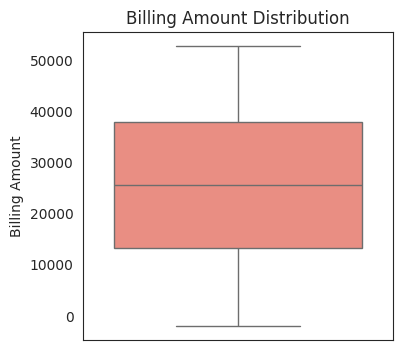

In [17]:
# Billing Amount Distribution To Check For Outliers

plt.figure(figsize =(4, 4))
sns.set_style('white')
sns.boxplot(df['Billing Amount'], color = 'salmon')
plt.title('Billing Amount Distribution')
plt.show()

In [18]:
# Test Results Destribution According To Medication

fig = px.sunburst(df, path = ["Test Results", "Medication"])
fig.update_traces(textinfo = "label + percent parent")
fig.update_layout(title_text = "Test Results by Medication",
                 titlefont = {'size' : 20, 'family' : 'Serif'},
                 width = 600, height = 600)
fig.show()

In [19]:
# Admission Type Distribution Accordng To Medical Condition

fig = px.sunburst(df, path = ["Admission Type", "Medical Condition"])
fig.update_traces(textinfo = "label + percent parent")
fig.update_layout(title_text = "Admission Type by Medical Condition",
                 titlefont = {'size' : 20, 'family' : 'Serif'},
                 height = 600, width = 600)

In [20]:
# Patients Overall Satatus Distribution

fig = px.sunburst(df, path = ["Gender", "Medical Condition", "Medication"])
fig.update_traces(textinfo = "label + percent parent")
fig.update_layout(title_text = "Patient's Status",
                 titlefont = {'size' : 20, 'family' : 'Serif'},
                 height = 600, width = 600)
fig.show()

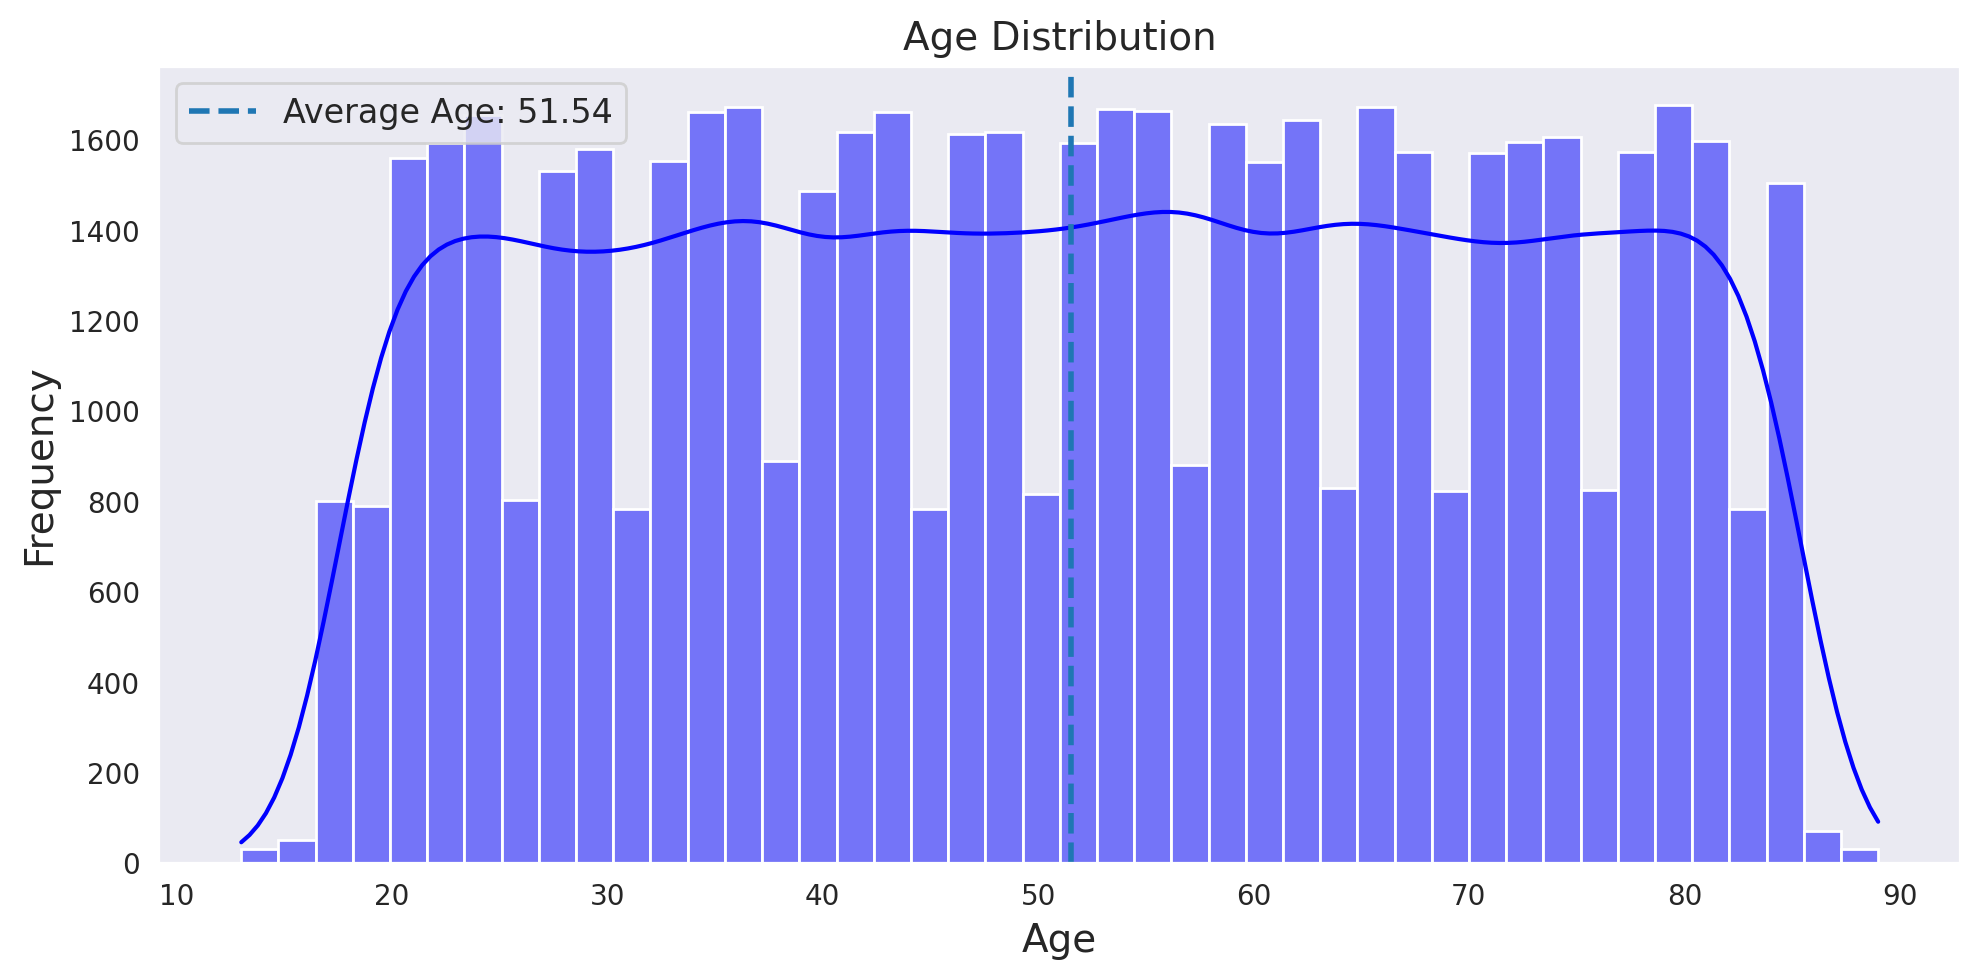

In [21]:
# Age Average Distribution

plt.figure(figsize=(10,5),dpi=200)
sns.set_style('dark')
sns.histplot(df['Age'],color='blue',kde=True)
plt.axvline(np.mean(df['Age']),ls='--',lw=2,label=f"Average Age: {np.mean(df['Age']):.2f}")
plt.title('Age Distribution',fontsize=14)
plt.xlabel('Age',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# **Predective Model Development**

## Model Selection

In [22]:
# Label Enocder (To Change Categorical Values To Numerial Values)

# Library
from sklearn.preprocessing import LabelEncoder

# Precessing
le = LabelEncoder()
cat_cols = []
for col in df.columns:
    if df[col].dtypes == "object":
        cat_cols.append(col)
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Display Data After Encoding
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,3068,30,1,5,2,1729,26612,29933,1,18856.281306,328,2,1730,3,2
1,15211,62,1,0,5,104,33648,16012,3,33643.327287,265,1,109,1,1
2,6476,76,0,1,5,1233,37828,5473,0,27955.096079,205,1,1247,0,2
3,26935,28,0,6,3,560,22511,12317,3,37909.782410,450,0,589,1,0
4,26241,43,0,2,2,1230,21259,33598,0,14238.317814,458,2,1249,4,0


In [24]:
# Categories Selection (All Exept Test Results)
X = df.drop(['Name','Test Results','Date of Admission', 'Discharge Date'], axis=1)

# Target Selection (Test Results)
y = df['Test Results']

# Code Insurance
print("Selection Complete!")

Selection Complete!


## Model Training

In [25]:
# Importing Model Training Library
from sklearn.model_selection import train_test_split

# Model Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)

# Code Insurance
print("Training Complete!")

Training Complete!


## Model Building

In [26]:
# Model Library
from sklearn.tree import DecisionTreeClassifier

# Model Object
model = DecisionTreeClassifier()

# Model Fitting
model.fit(X_train, y_train)

DecisionTreeClassifier()

## Model Prediction & Results

In [44]:
# Importing Model Results Library
from sklearn import metrics

# Model Prediction
y_pred = model.predict(X_test)

# Accuracy, Precision, Recall, F-Score, Mean Absolute Error (MAE), Mean Squared Error (MSE)
Accuracy = metrics.accuracy_score(y_test, y_pred) * 100
Precision = metrics.precision_score(y_test, y_pred, average = 'weighted')
Recall = metrics.recall_score(y_test, y_pred, average = 'weighted')
F_Score = metrics.f1_score(y_test, y_pred, average = 'weighted')
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)

# Displaying
print(f'Accuracy: {Accuracy:.2f}%')
print('Precision:', Precision)
print('Recall:', Recall)
print('F-Score:', F_Score)
print('Mean Absolute Error:', MAE)
print('Mean Squared Error:', MSE)

# Classification Report
print('\nClassification Report:')
print(metrics.classification_report(y_test, y_pred))

Accuracy: 41.70%
Precision: 0.4171445232416732
Recall: 0.41704566126978354
F-Score: 0.41702493506380456
Mean Absolute Error: 0.7781517191195197
Mean Squared Error: 1.1685464798981262

Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.42      0.42      3616
           1       0.42      0.41      0.41      3682
           2       0.42      0.42      0.42      3696

    accuracy                           0.42     10994
   macro avg       0.42      0.42      0.42     10994
weighted avg       0.42      0.42      0.42     10994



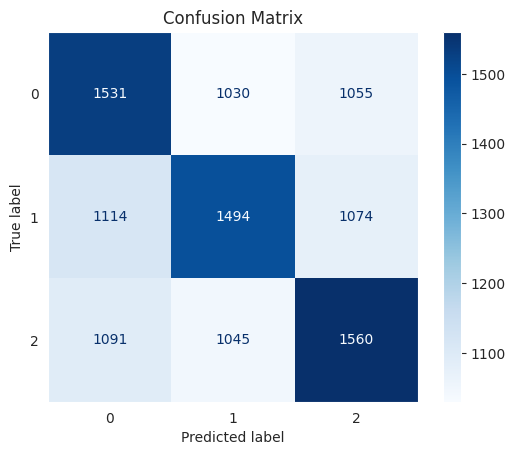

In [28]:
# Confusion Matrix

# Compute the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# **MLFlow**

## Installations

In [45]:
!pip install  mlflow -q
!pip install pyngrok -q

# Code Insurance
print("Installations Complete!")

Installations Complete!


##  Server Setup

In [46]:
# Required Libraries
import mlflow
import pyngrok
import subprocess
from pyngrok import ngrok, conf

# Server Setup
MLFLOW_TRACKING_URI = "sqlite:///mlflow.db"
subprocess.Popen(["mlflow", "ui", "--backend-store-uri", MLFLOW_TRACKING_URI])

# Code Insurance
print("Server Setup Complete!")

Server Setup Complete!


## Experiment Setup

In [47]:
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)
mlflow.set_experiment("HealthCare Prediction")

# Code Insurance
print("Experiment Setup Complete!")

Experiment Setup Complete!


## Server Connection

In [50]:
# Required Libraries
import getpass

# Retrieving Authotoken From Ngrok Dashboard Website
print("Enter your authtoken, which can be copied from https://dashboard.ngrok.com/signup")
conf.get_default().auth_token = getpass.getpass()

# Creating Server Port
port = 5000

public_url = ngrok.connect(port).public_url
print(f' * ngrok tunnel \"{public_url}\"')

# Code Insurance
print('\nConnection Success! Click On Port URL To Open ML-Flow Server!')

Enter your authtoken, which can be copied from https://dashboard.ngrok.com/signup
··········
 * ngrok tunnel "https://f0dc-35-236-227-148.ngrok-free.app"

Connection Success! Click On Port URL To Open ML-Flow Server!


## DTC Tracking

In [51]:
from mlflow.models import infer_signature

# Start an MLflow run
with mlflow.start_run():

    # Log the loss metric
    mlflow.log_metric("Accuracy", Accuracy)
    mlflow.log_metric("Precision", Precision)
    mlflow.log_metric("Recall", Recall)
    mlflow.log_metric("F1", F_Score)
    mlflow.log_metric("Mean Absolute Error", MAE)
    mlflow.log_metric("Mean Squared Error", MSE)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "Basic DTC Model For HealthCare Data")

    # Infer the model signature
    signature = infer_signature(X_train, y_pred)

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model = model,
        artifact_path = "DTC_Model",
        signature = signature,
        input_example = X_train,
        registered_model_name = "Tracking-DTC",
    )

    # Code Insrance
    print("ML-Flow Run Complete!")

Successfully registered model 'Tracking-DTC'.
Created version '1' of model 'Tracking-DTC'.


ML-Flow Run Complete!
